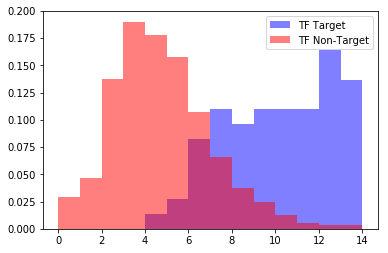

In [4]:
"""
This module is designed to give data about the half site hypothesis and provide graphs of half sites vs TPH.

NJM
5/31/18
"""



from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from analyze_sig_hits_v2 import pssm, add_pwm_info,make_comparison_frame, get_pssm, get_max_pwm_score
from ROC_maker import getSpacing




def initFrame(file1 = 'sig_prom_Gal4_FL_HarbIG_Final.txt', file2 = 'sig_prom_Gal4_DBD_HarbIG_Final.txt', cutoff = .0001, removeCannonical = False):
	""" 
    function returns a bound dataframe ("positives") and unbound dataframe ("negatives")
    """
	cf = make_comparison_frame(file1,file2,'FL','DBD', bs = False)
	if removeCannonical:
        #The region has a Gal4 site if it has values in the given pwm
        #Removes all promoters with a Gal4 site 
		cf = removeCannon(cf, cutoff = 13.01)
    #we define that a region is bound by Gal4p when it has a poisson pvalue <  10−^5
	positives = cf[cf["FL pvalue"]<cutoff]
	negatives = cf[cf["FL pvalue"]>cutoff]

	return positives,negatives


def HShistogramMax400(pos,neg):
	"""
	returns a with the number of half sites on the x axis and number of targets and nontargets on the y axis 
	    
	"""
	posArray = []
	negArray = []
	for index, row in pos.iterrows():
		dna_cursor = Seq(str(row["Sequence"]), IUPAC.unambiguous_dna)
		HS = getMax400(dna_cursor)
		posArray.append(HS)
	#Repeat for neg
	for index, row in neg.iterrows():
		dna_cursor = Seq(str(row["Sequence"]), IUPAC.unambiguous_dna)
		HS = getMax400(dna_cursor)
		negArray.append(HS)

	posWeights = np.ones_like(posArray)/float(len(posArray))
	negWeights = np.ones_like(negArray)/float(len(negArray))
	plt.hist(posArray, weights = posWeights, bins = np.arange(0,15,1) , label = "TF Target",  fc = (0,0,1,0.5))
	plt.hist(negArray, weights= negWeights , bins = np.arange(0,15,1), label = "TF Non-Target", fc = (1,0,0,0.5))
	plt.legend()
	plt.show()
    #ttest to determine if the difference between the number of half sites for targets and nontargets is significant 
#	return stats.ttest_ind(posArray, negArray, axis=0, equal_var=False)





def getMax400(seq):
	"""
	returns the max number of CGG halfsites in a 400 bp window
    
	"""
	totals = []
	for x in range(0,len(seq)-399):
		inputSeq = seq[x:x+400]
		totals.append(inputSeq.count("CGG"))
	seq = seq.reverse_complement()
	for x in range(0,len(seq)-399):
		inputSeq = seq[x:x+400]
		totals.append(inputSeq.count("CGG"))
	if totals:
		return max(totals)
	else:
		return 0


def removeCannon(df, cutoff = 13.01, tf = 'Gal4'):
	"""
	returns a dataframe with all promoters that have a Gal4 site removed 
	"""
	df["Score"] = df["Sequence"].apply(lambda x: get_max_pwm_score(x,tf))
	newdf = df[df["Score"]<cutoff]
	return newdf






"""Workbook"""

"""
#Correlation
file1 = 'sig_prom_Gal4_FL_HarbIG_Final.txt'
file2 = 'sig_prom_Gal4_DBD_HarbIG_Final.txt'
cf = make_comparison_frame(file1,file2,'FL','DBD', bs = False)

plotHS(cf,"Hits",'ro', True)




pos, neg = initFrame()
HShistogram(pos,neg,True)

"""
"""
pos, neg = initFrame(removeCannonical = False)
HShistogramMax200(pos,neg)
"""
"""
pos, neg = initFrame()
spacingHist(pos,neg)
"""
pos, neg = initFrame(removeCannonical = True)
HShistogramMax400(pos,neg)

